In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import matplotlib.ticker as ticker
from scipy.stats import norm
%matplotlib inline

### Task 1

#### The Ornstein-Uhlenbeck process:   

$$dX_{t} = -\theta X_{t} + \sigma d W_{t}$$
$$ X(0) = 10$$
$$ \theta = 5 $$  
$$ \sigma = 3.5 $$

In [91]:
def BM(T, N):
    W =[]
    W += [0]
    Delta = T / N
    X =[i / 100 for i in range(101)]
    for i in range(1, len(X)) :
        W += [W[i - 1] + np.random.normal(0, 1, 1)[0] * np.sqrt(Delta)]
    return W


In [92]:
N = 100
T =1
x = 10
theta = 5
sigma = 3.5

W = BM(T, N)
t =[i / 100 for i in range(101)]
X = [0 for i in range(N)]
X [0]= x
ito_sum =[np.exp(-theta * (t[i] - t[i - 1])) * (W[i] - W[i - 1]) for i in range(1, N)]
X = [X[0] * np.exp(-theta * t[i]) + sum(ito_sum[0 : i]) for i in range(N)]
X = [X[0]] + X

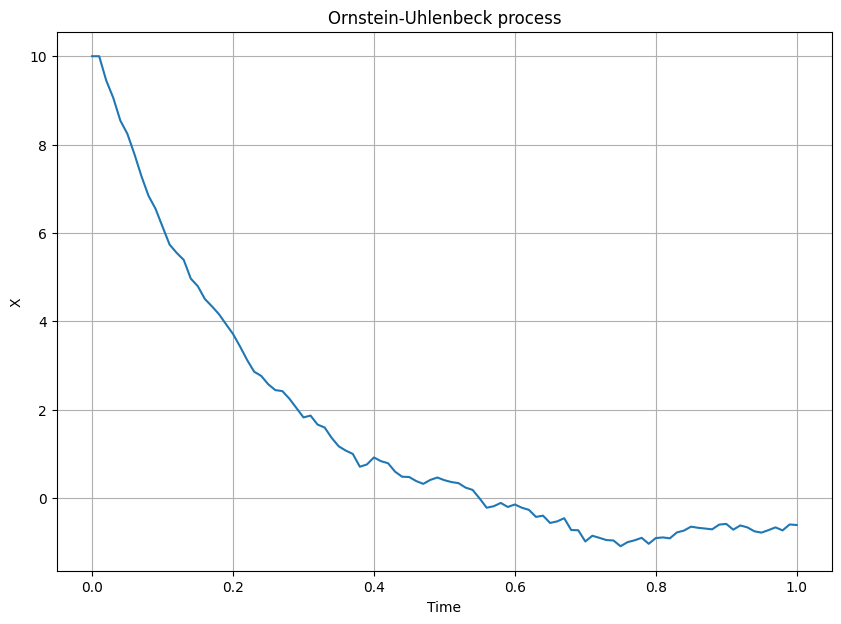

In [93]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(t , X)
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel('Time')
plt.ylabel('X')
plt.show()

#### The Cox-Ingersoll-Ross process
$$ dX_{t} = (\theta _{1} - \theta _{2} X_{t})dt + \theta_{3} \sqrt{X_{t}}dW_{t}$$
#### sometimes parametrized as
$$ dX_{t} = \theta(\beta - X_{t})dt + \sigma \sqrt{X_{t}}dW_{t}$$
$$ X_{0} = x_{0} > 0$$
$$ \theta = (2.0, 0.2, 0.15)$$

In [424]:
def CIR1(X, theta1, theta2, theta3, dt):
    DX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

In [425]:
def CIR2(X, theta, beta, sigma, dt):
    DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

In [434]:
theta1 = 1
theta2 = 2
theta3 = 0.3

N = 1000
X = np.zeros(N)
X[0] = 10
theta = 5
sigma = 3.5
beta = 1.1
for i in range(1, len(X)):
    X[i] = X[i - 1] + CIR2(X[i - 1], theta, beta, sigma, 1 / N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


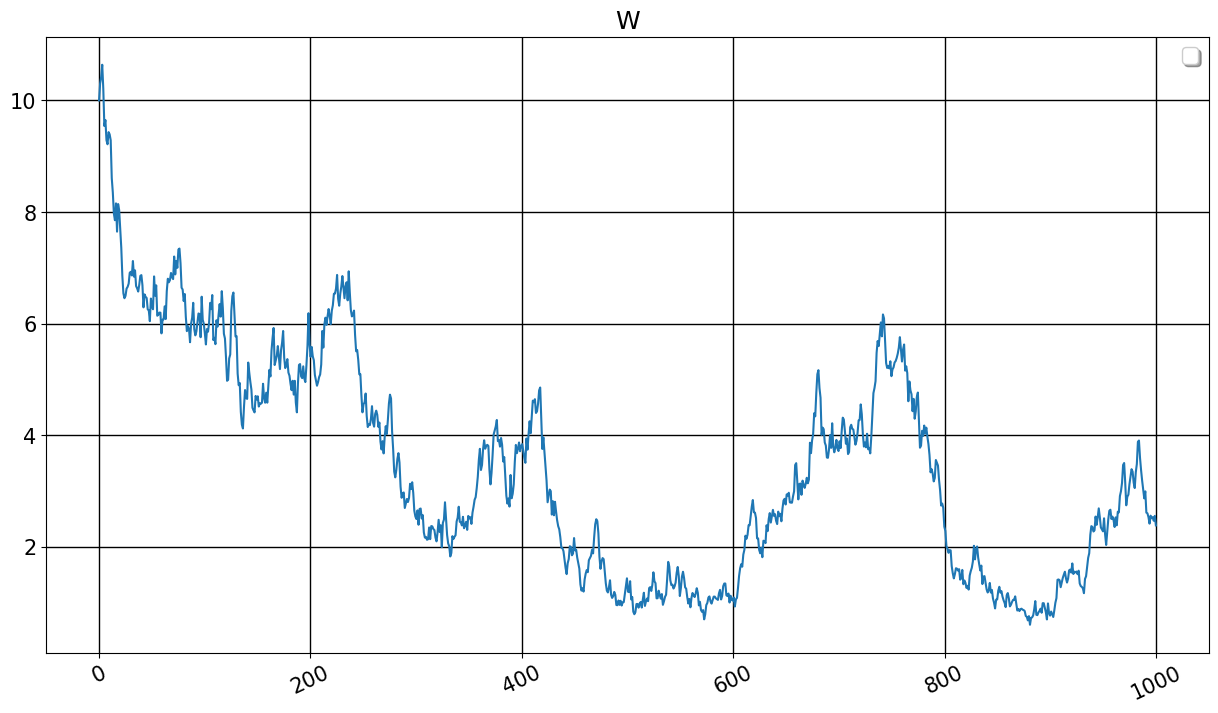

In [435]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

#### the Black-Scholes process
$$ dS_{t} = \mu S_{t}dt + \sigma S_{t}dW_{t}$$

In [442]:
def BSM(X, theta1, theta2, dt):
    DX = theta1 * X * dt + theta2 * X * np.random.normal(0, np.sqrt(dt))
    return DX

In [455]:
N = 10000
X = np.zeros(N)
X[0] = 10
theta1 = -1.0
theta2 = 0.2
for i in range(1, len(X)):
    X[i] = X[i - 1] + BSM(X[i - 1], theta1, theta2, 1 / N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


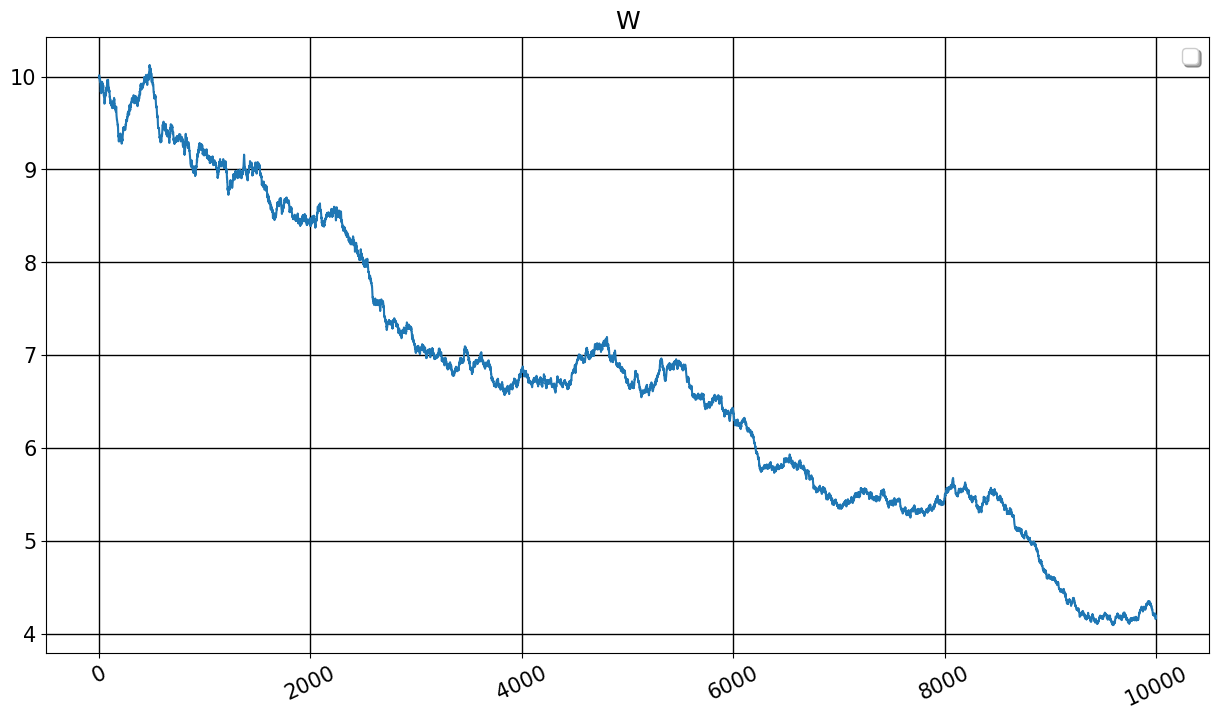

In [456]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

### Task 2

$$ k = {4 \alpha \over \sigma^{2}}$$

$$ \zeta = {\sigma^{2} (1 - e^{-\beta(t - s)}) \over 4\beta}$$

$$\lambda = {4\beta e^{-\beta(t - s)} x(s) \over \sigma^{2}(1 - e^{- \beta (t - s)})}$$

$$ v_{lower}(s, t) = \zeta \left(k + \lambda - \xi \sqrt{2(k + 2\lambda)}\right) $$

$$ v_{upper}(s, t) = \zeta \left(k + \lambda + \xi \sqrt{2(k + 2\lambda)}\right) $$


In [3]:
def param_k(alpha, sigma):
    return (4 * alpha) / (sigma ** 2)

In [92]:
def param_zeta(t, s, N, sigma, beta):
    return (sigma ** 2) * (1 - np.exp(-beta * (t / N - s / N))) / (4 * beta)

In [116]:
def param_lambda(t, s, N, x, sigma, beta):
    return 4 * beta * np.exp(-beta * (t / N - s / N)) * x / (sigma ** 2 * (1 - np.exp(-beta * (t / N - s / N))))

In [17]:
def param_xi(alpha_0):
    return norm.ppf(1 - alpha_0/2)

In [52]:
def v_lower(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda - xi * np.sqrt(2 * (k + 2 * my_lambda)))

In [93]:
def v_upper(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda + xi * np.sqrt(2 * (k + 2 * my_lambda)))

In [18]:
def CIR2(X, theta, beta, sigma, dt):
    DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

In [162]:
N = 100
X = np.zeros((100, N))
theta = 0.1
sigma = 0.1
beta = 0.1
for j in range(0, 100):
    X[j][0] = 10
    for i in range(1, N):
        X[j][i] = X[j][i - 1] + CIR2(X[j][i - 1], theta, beta, sigma, 1 / N)

In [178]:
V_LOWER = np.zeros(N)
V_UPPER = np.zeros(N)
V_LOWER[0] = X[0][0] = 10
V_UPPER[0] = X[0][0] = 10

k = param_k(theta, sigma)
xi = param_xi(0.01)

for i in range(1, N):
    zeta = param_zeta(i, 0, N, sigma, beta)
    my_lambda = param_lambda(i, 0, N, 10, sigma, beta)
    V_LOWER[i] = v_lower(k, zeta, my_lambda, xi)
    V_UPPER[i] = v_upper(k, zeta, my_lambda, xi)

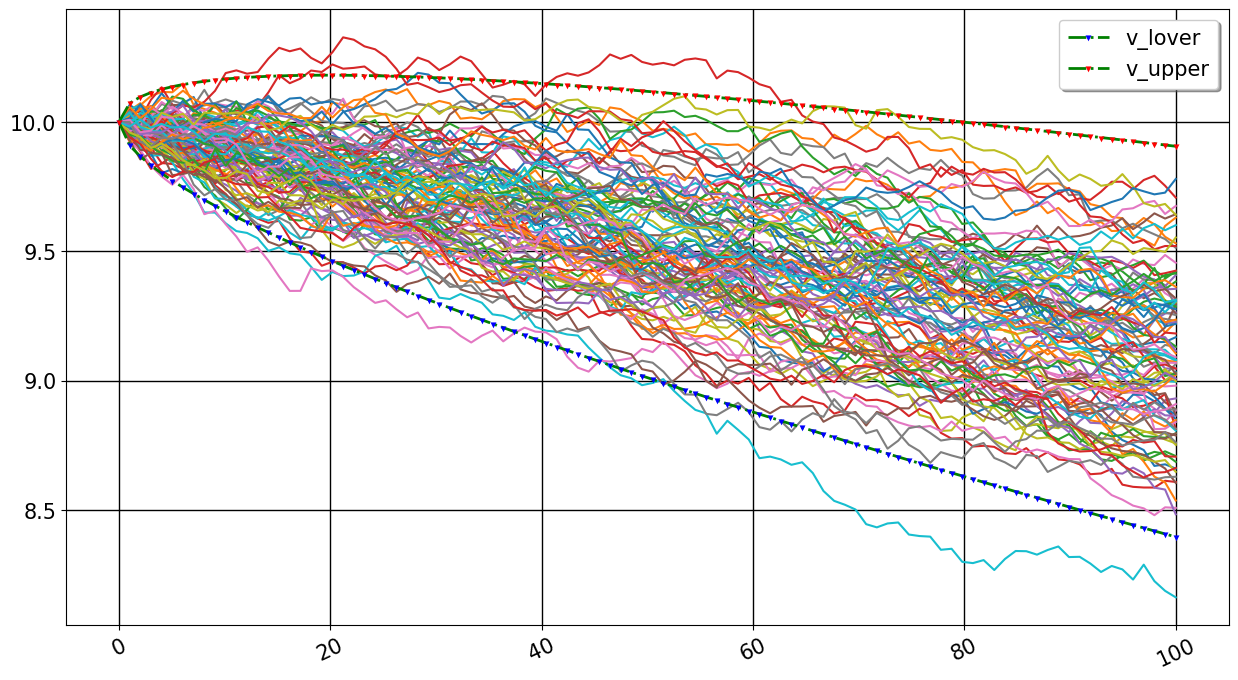

In [180]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
for j in range(100):
    plt.plot(np.linspace(0, N, N), X[j])

plt.plot(np.linspace(0, N, N), V_LOWER, 'v-.g', label="v_lover", mec='b', lw=2, mew=2, ms=1)
plt.plot(np.linspace(0, N, N), V_UPPER, 'v-.g', label="v_upper", mec='r', lw=2, mew=2, ms=1)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.show()

### Task 3
#### The Ornstein-Uhlenbeck process:   

$$dX_{t} = \theta (\mu  - X_{t})dt + \sigma d W_{t}$$
$$ X(0) = 0.0, 2.0, N(\mu, {\sigma^{2} \over 2\theta})$$
$$ \theta = 1 $$
$$ \mu = 1.2 $$  
$$ \sigma = 0.3 $$

In [7]:
def OU(X, theta, mu, sigma, dt):
    dX = theta * (mu - X) * dt + sigma * np.random.normal(0, np.sqrt(dt))
    return dX

In [26]:
N = 10000
X = np.zeros(N)
Y = np.zeros(N)
Z = np.zeros(N)
theta = 1.0
mu = 1.2
sigma = 0.3
Z[0] = np.random.normal(mu, (sigma ** 2) / 2 * theta)
Y[0] = 0.0
X[0] = 2.0
for i in range(1, len(X)):
    X[i] = X[i - 1] + OU(X[i - 1], theta, mu, sigma, 1 / N)
    Y[i] = Y[i - 1] + OU(Y[i - 1], theta, mu, sigma, 1 / N)
    Z[i] = Z[i - 1] + OU(Z[i - 1], theta, mu, sigma, 1 / N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


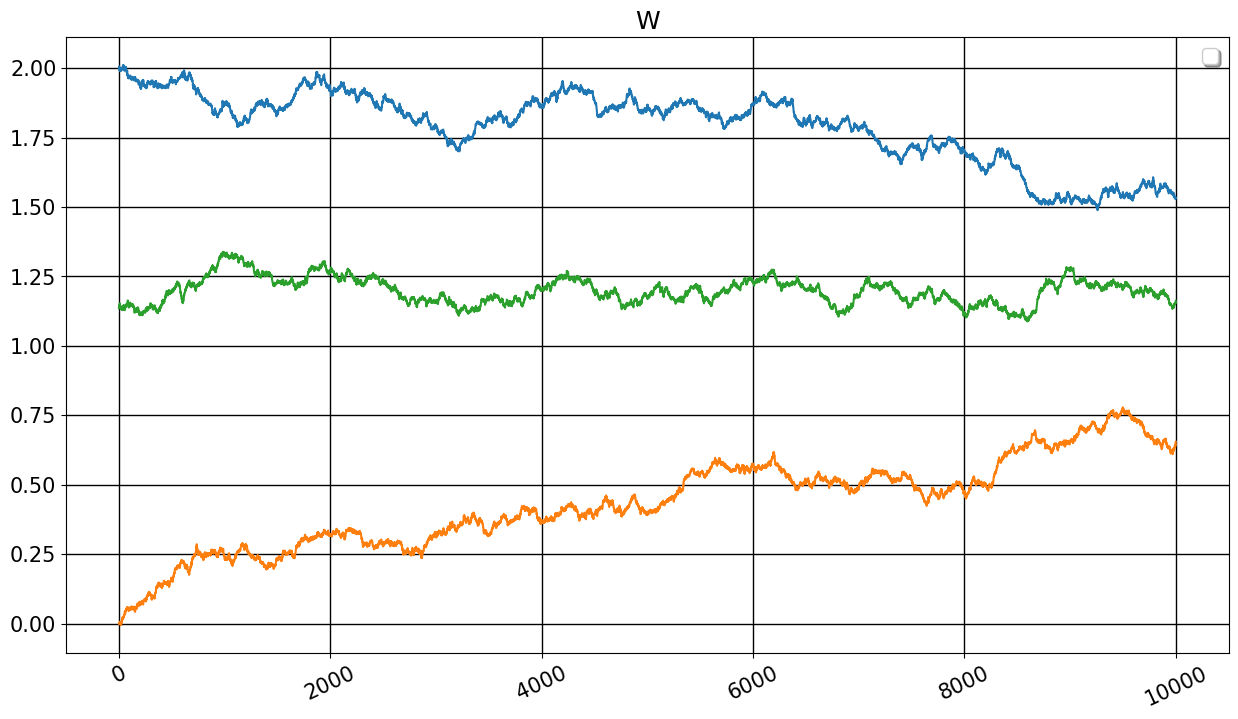

In [27]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)
plt.plot(np.linspace(0, N, N), Y)
plt.plot(np.linspace(0, N, N), Z)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

### Task 4

Design a process that stays in the interval [0, 1] and mean-reverts around
1/2, generate and plot in graph.

In [13]:
def BS(S, mu, sigma, dt):
    dS = mu * S * dt + sigma * S * np.random.normal(0, np.sqrt(dt))
    return dS

In [17]:
mu = 0
sigma = 0.1
N = 100000
S = np.zeros(N)
S[0] = 0.5
for i in range(1, N):
    S[i] = S[i - 1] + BS(S[i - 1], mu, sigma, 1 / N)

In [18]:
print(np.mean(S), max(S), min(S))

0.510767373726173 0.5457826000443754 0.46428434132308805


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


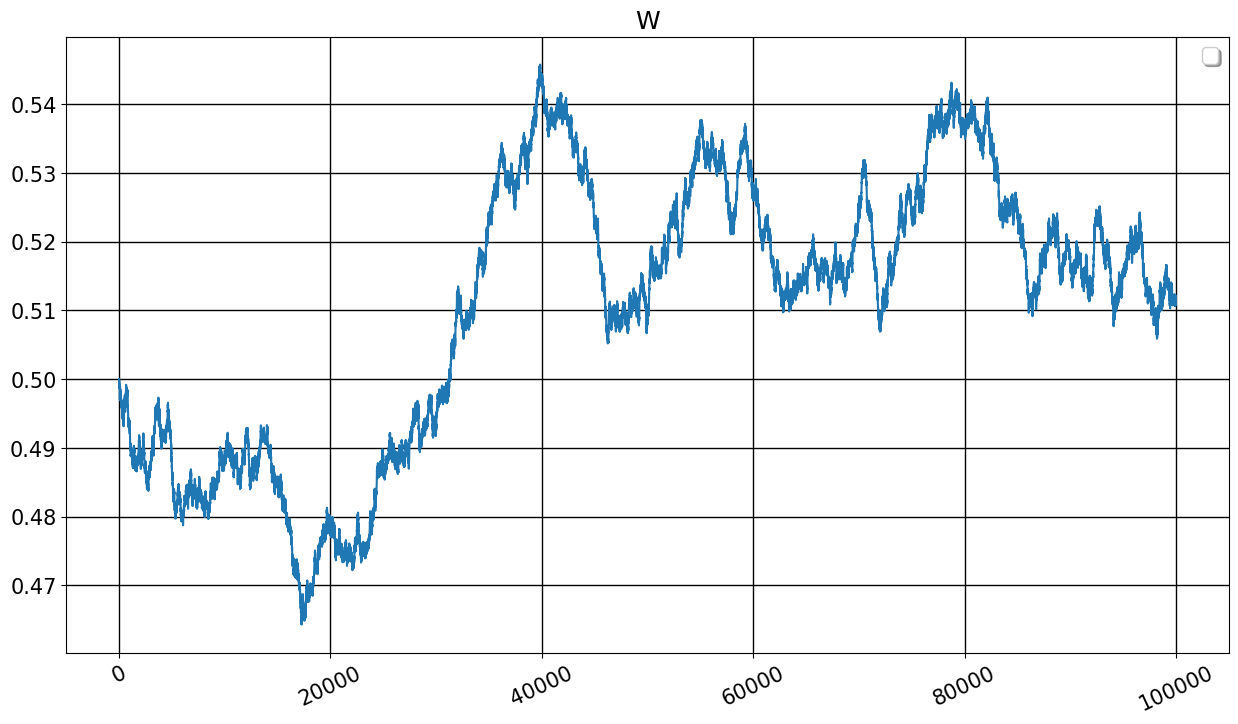

In [19]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0.0, len(S), num=len(S)), S, label='')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)
plt.plot(np.linspace(0, N, N), V_LOWER)
plt.plot(np.linspace(0, N, N), V_UPPER)
fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()